In [193]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 16})

import sys
sys.path.append("../../scripts")
import importlib

import model
importlib.reload(model)
from model import Model, model_from_file

import model_plot
importlib.reload(model_plot)
from model_plot import model_plot

%matplotlib inline

In [194]:
def result_inter_params(model):
    params_a = model.additional[-1, -3]
    params_b = model.additional[-1, -2]
    print('a = ', params_a, ', b = ', params_b, sep='')

In [195]:
def result_plot(model, xlim=None):
    rs = np.concatenate([np.linspace(0, model.xs[0], 6), model.xs[1:]])
    phi = np.concatenate([model.additional[-1, -10:-3].to_numpy(), model.phi[-1, 1:].to_numpy()])
    plt.figure(figsize=(10, 5))
    plt.grid(True)
    if xlim is not None:
        plt.xlim(xlim)
    plt.xlabel('$x$')
    plt.ylabel('$\phi$')
    plt.plot(rs, phi)
    plt.show()

In [196]:
def result_norm(model):
    print('norm:', model.df_additional.iloc[-1, -1])
    print('time:', (model.df_phi.shape[0] - 1) * model.params['dt_data'])

In [197]:
def run_all(model, xmax=None):
    result_inter_params(model)
    result_norm(model)
    xlim = None
    if xmax is not None:
        xlim = [-xmax / 20, xmax]
    result_plot(model, xlim)

a = -0.00327765976, b = 2.00000011
norm: 6.66103173e-10
time: 7.3999999999999995


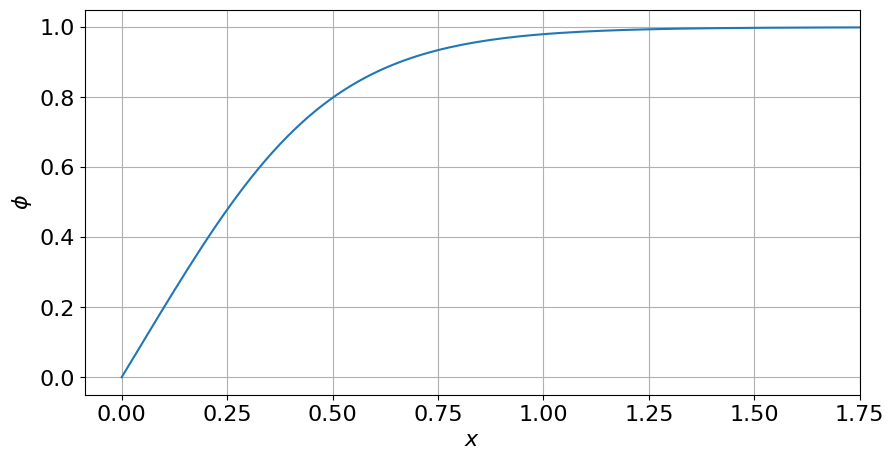

In [198]:
model_300 = model_from_file('../../bin/model_300.csv')
run_all(model_300, 1.75)

a = -0.000118055645, b = 1.0
norm: 6.65520528e-10
time: 5.0


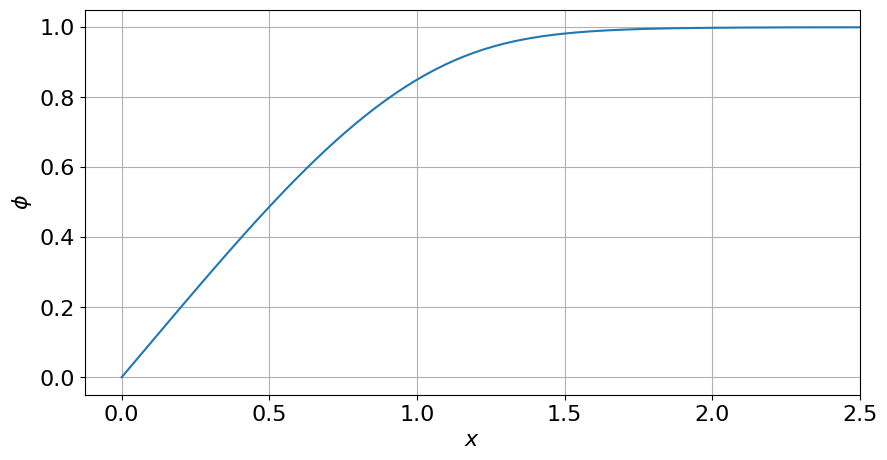

In [199]:
model_300_p = model_from_file('../../bin/model_300_p.csv')
run_all(model_300_p, 2.5)

a = -0.928344806, b = 1.41472934
norm: 8.34245228e-10
time: 6.1


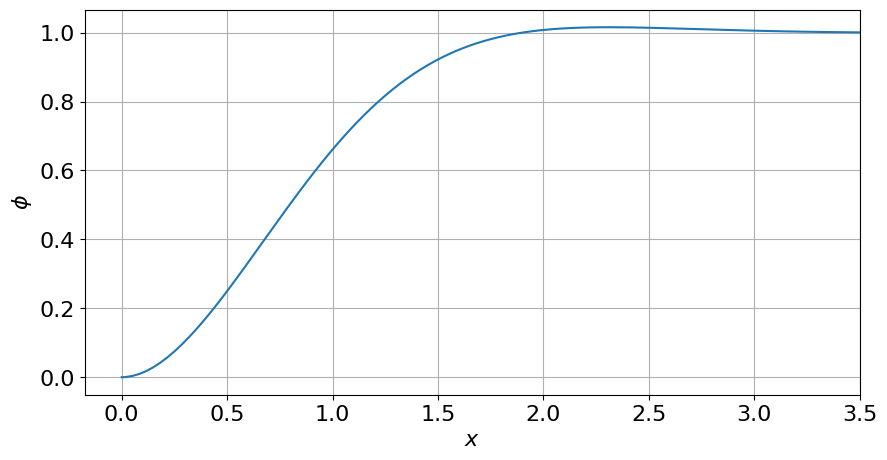

In [200]:
model_150_bi = model_from_file('../../bin/model_150_bi.csv')
run_all(model_150_bi, 3.5)

a = 1.29482356, b = -0.0493261791
norm: 4.44089008e-10
time: 4.199999999999999


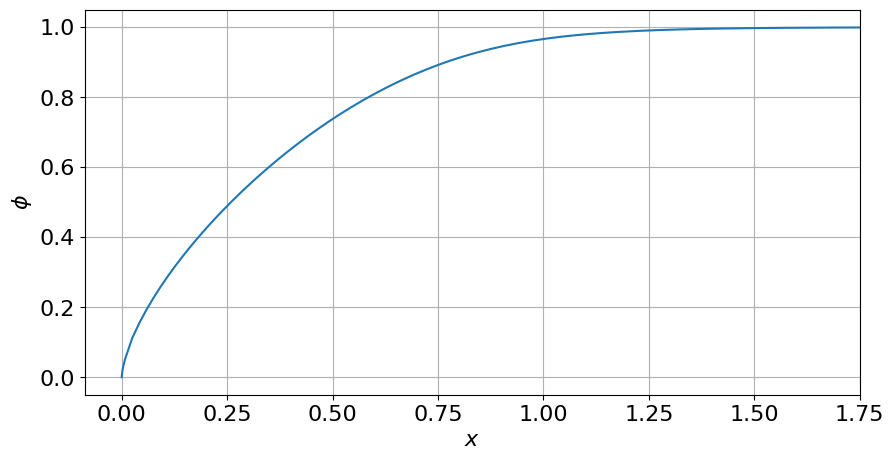

In [201]:
model_300_cyl_p = model_from_file('../../bin/model_300_cyl_p.csv')
run_all(model_300_cyl_p, 1.75)

a = -1.27218059, b = -0.752315151
norm: 8.84166462e-10
time: 4.3999999999999995


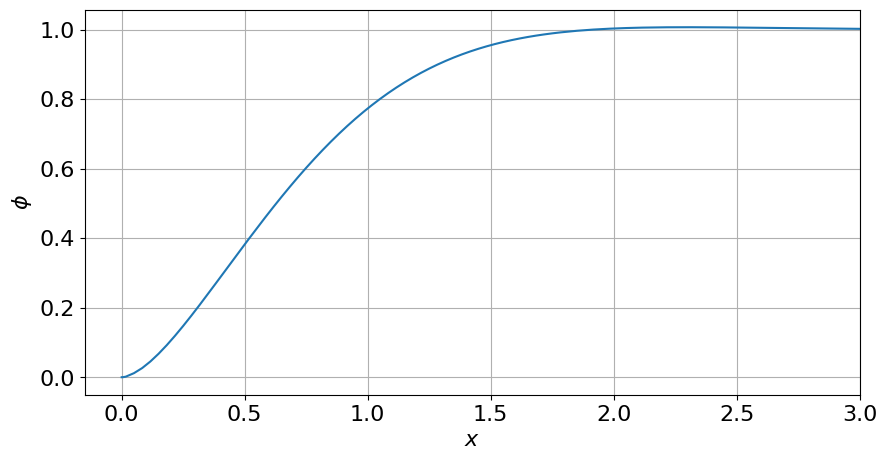

In [202]:
model_150_cyl_bi = model_from_file('../../bin/model_150_cyl_bi.csv')
run_all(model_150_cyl_bi, 3)

a = 1.32207622, b = -0.0247075377
norm: 4.44089129e-10
time: 3.8


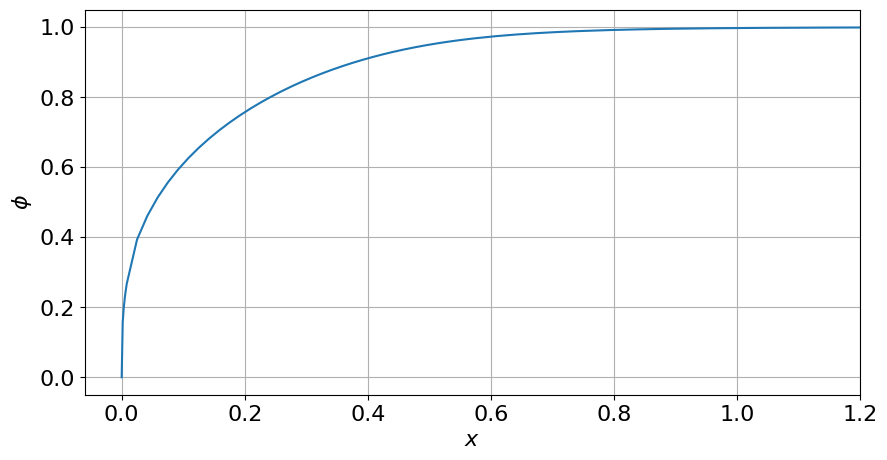

In [203]:
model_300_sph_p = model_from_file('../../bin/model_300_sph_p.csv')
run_all(model_300_sph_p, 1.2)